**https://machinelearningflashcards.com/**

## Accuracy
## AdaBoost
## Adjusted R^2
## Agglomerative Clustering

In [5]:
#accuracy
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
print(accuracy_score(y_true,y_pred),'\t',accuracy_score(y_true,y_pred,normalize=False))

0.5 	 2


In [ ]:
#AdaBoost 自适应增强算法
#https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf
#https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/MLND+documents/schapire.pdf
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)
model.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(
                           base_estimator = DecisionTreeClassifier(max_depth=2), #若学习器使用的模型
                           n_estimators = 4) #使用的弱学习器的最大数量

`Adjusted R^2`

$$\hat{R}^2 = 1- \frac{RSS/(n-d-1)}{TSS/(n-1)}$$

$$RSS=\sum_{i=1}^n (x_i-\hat{x})^2$$

$$TSS=\sum_{i=1}^n (x_i-\bar{x})^2$$

$$R^2 = 1-\frac{RSS}{TSS}$$

In [9]:
from sklearn.metrics import r2_score
def adjusted_r2_score(y_true,y_pred):
    n = len(X)
    d = X.shape[1]
    return 1- (1-r2_score(y_true,y_pred))*(n-1)/(n-d-1)

In [ ]:
#Agglomerative Clustering  （complete link clustering）
#complete link actually looks at the farthest two points in the two clusters
#全连接聚类法关注度是两个类中两点之间最远的距离（作为两类之间的最小距离）
#全连接聚类法产生的类比较紧凑
from sklearn import datasets, cluster
X = datasets.load_iris().data[:10]
cluster = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
#linkage=['ward','complete','average']
labels = cluster.fit_predict(X)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [21.875, 21.875, 73.75, 73.75]],
 'dcoord': [[0.0, 0.17320508075688784, 0.17320508075688784, 0.0],
  [0.0, 0.24494897427831802, 0.24494897427831802, 0.0],
  [0.0, 0.3162277660168378, 0.3162277660168378, 0.24494897427831802],
  [0.0, 0.4999999999999998, 0.4999999999999998, 0.3162277660168378],
  [0.17320508075688784,
   0.5744562646538034,
   0.5744562646538034,
   0.4999999999999998],
  [0.0, 0.1414213562373093, 0.1414213562373093, 0.0],
  [0.0, 0.2160246899469288, 0.2160246899469288, 0.1414213562373093],
  [0.0, 0.7799572637865063, 0.7799572637865063, 0.2160246899469288],
  [0.5744562646538034,
   1.450172403543799,
   1.450172403543799,
   0.7799572637865063]],
 'ivl': ['1', '9', '8', '6', '2', '3', '5', '7', '0', '4'],
 'leaves': [1, 9, 8, 6, 2, 3, 5,

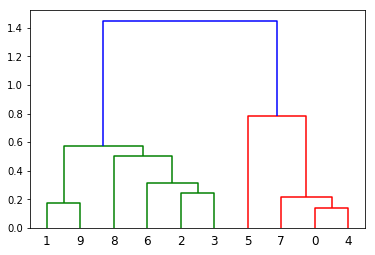

In [14]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
X = datasets.load_iris().data[:10]
linkage_matrix = ward(X)

dendrogram(linkage_matrix)


# AIC Akaike Information Criterion
# Almost Everything
# Alpha in Ridge Regression
# Anscombe's Quartet

`AIC`在特征选择是用于比较那个模型更好
$$AIC = \frac{1}{n*\hat{σ}^2}*(RSS+2d\hat{σ}^2)$$

In [5]:
#Anscombe's Quartet
import seaborn as sns
import pandas as pd
anscombe = sns.load_dataset('anscombe')

In [6]:
anscombe.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

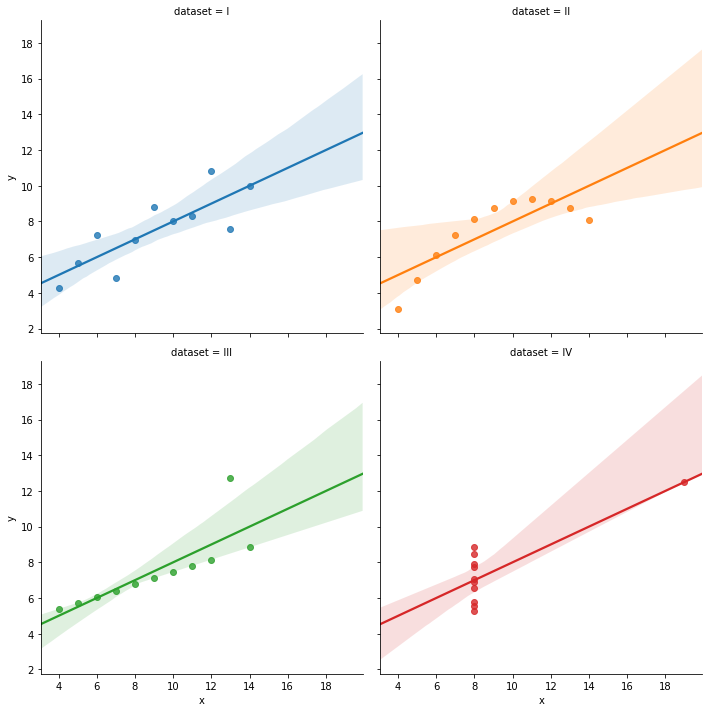

In [9]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,col_wrap=2)

`Alpha in Ridge Regression`
- L1 Regularization (Lasso)
it taks the coefficients and just adds the **absolute values**
- L2 Regularizaion (Ridge)
add the **squares** of the coeffiecients
```python
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
```

- lambda 惩罚项系数 （即alpha）

| L1 Regularization                                  | L2 Regularization         |
|----------------------------------------------------|---------------------------|
| Computationally Inefficient (unless data is spare) | Computationally Efficient |
| Sparse Outputs                                     | Non-sparse Outpurs        |
| Feature Selection                                  | No Feature Selection      |


# Architecture of a Neual Network
# AUC 
# Avoid Over-Fitting
- Simple Models
- Cross-Validated Evaluation
- Regularization
- Get more data
- Ensemble Learning
# Back-Prop
> Back Propagation
- Algorithm to send infomation backwards through a neural network
- Computes the gradient of the loss function w/ respect to the parameters
- Is not responsible for updating parameters which is done by optimization algorithms

#AUC

`真阳性比例：在所有阳性标记的点中，有多少点分类正确`
$$TPR = \frac{TP}{TP+FN} = \frac{TP}{all + }$$
`假阳性比例：在所有阴性点中，模型错误地认为有多少是阳性的`
$$FPR = \frac{FP}{TN + FP} = \frac{FP}{all -}$$

In [5]:
from sklearn.metrics import roc_auc_score
import numpy as np
y_true = np.array([0,0,1,1])
y_scores = np.array([0.1,0.4,0.35,0.8])
roc_auc_score(y_true,y_scores)

0.75

In [19]:
from sklearn import metrics
y_true = np.array([1, 1, 2, 2])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores, pos_label=2)
print(fpr,'\t',tpr,'\t',thresholds)

[0.  0.5 0.5 1. ] 	 [0.5 0.5 1.  1. ] 	 [0.8  0.4  0.35 0.1 ]


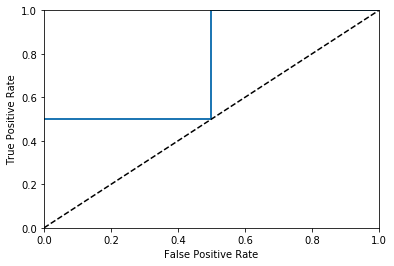

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr,label=None):
        plt.plot(fpr,tpr,linewidth=2,label=label)
        plt.plot([0,1],[0,1],'k--')
        plt.axis([0,1,0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        
plot_roc_curve(fpr,tpr)
plt.show()

# Bag of Words
> 词袋：将文本转化为矩阵，其中，每一行都是一个观测值，每一特征都是一个独立的词。
# Bagging (Bootstrap Aggregation)
![](http://upload.ouliu.net/i/20190508114329lt7si.png)
# Bagging vs. Dropout
- Models:
    - Bagging: all models are independent
    - Dropout: subnetworks share parameters
- Training:
    - Bagging: all models are trained
    - Dropout: only a fraction of possible subnetworks are trained
# Deep Learning Basic Parts
- Data
- Loss function (cross-entropy)
- Optimization algorithm (Adam)
- Network Architecture (Dense Layers)
- Test data
- Evaluation metric (Accuracy)


# Bayes Error
# Bayes Theorem
![](http://upload.ouliu.net/i/20190509110137ll1q9.png)
# Pros & Cons of Bayesian Methods
- 优点
    - 在数据少的情况下表现不错
    - 十分直观
- 缺点
    - 数据多是计算代价高
    - 必须选择先验条件
    
# Bias

# Bias-Variance Trade off
# Big O
> 如果不用太严谨的眼光看待大 O 标记，那么它其实是告诉你：随着输入数据量的增长，你的算法将花费多少时间。如果你有一个 O[N]（读作“N 阶”）复杂度的算法，该算法花费 1 秒钟来执行一个长度为 N = 1000 的列表，那么它执行一个长度为 N = 5000 的列表花费的时间大约是 5 秒钟。如果你有一个算法复杂度为 O[N^2]（读作“N 的平方阶”），且该算法花费 1 秒钟来执行一个长度为 N = 1000 的列表，那么它执行一个长度为 N = 5000 的列表花费的时间大约是 25 秒钟。
# Boosting
> 一种训练一些列若模型的集成学习策略，每个模型都会尝试正确预测先前模型预测错的观测值。
![](http://upload.ouliu.net/i/2019051015371686k2j.png)
# Bootstrap
> Obtaining many new datasets by repeated sampling with replacement from the original dataset.

# Brierscore
$$RSS=\frac{1}{n}\sum_{i=1}^n (\hat{P}-O)^2$$
布莱尔分数展现了所有观测值的预测概率和实际结果间的均方误差。越低越好
# Inverse of Regularization Strength
正则化强度α的倒数，一般使用C表示
# Capacity
机器学习算法的容量是他学习多种可能函数的能力，更高的容量意味着过拟合风险下更灵活的模型
# Categorical Feature

# Chain Rule of Calculus
  微积分链式法则：用于有效地计算反向传播中的梯度。反向传播通常在张量上使用链式法则。
 $\frac{dz}{dx}=\frac{dz}{dy}*\frac{dy}{dx}$
# Chi-Squared for Feature Selection

# Chi-Squared
测试分类性数据和随机情况相比的不同程度
# Classification

In [3]:
#Chi-Squared for Feature Selection
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
mdl1 = SelectKBest(chi2,k=2)
mdl1.fit_transform(iris.data,iris.target)

/Users/randall/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
mdl1.pvalues_ - 0.05

array([-0.04552349,  0.11575417, -0.05      , -0.05      ])

# Combination
# Common Optimizers for Neural Nets
1. Stocastic Gradient Desent
2. Stocastic Gradient Desent with Momentum 动量随机梯度下降
3. RMS Prop 均方根传播
4. Adam 自适应矩估计

# Common Output Layers Activation Functions
激活函数常见输出层
1. 二分类 Sigmod
2. 多分类 Softmax
3. 回归 **无激活函数**

# Concave & Convex
举例：Convex 凸函数
$$y=x^2$$

# Conditional Probability
# Conditioning
> 调节能力用于衡量当函数的输入发生变化时，函数输出的变化程度。

# Confidence Intervals
> 95%的置信度意味着，如果我们执行相同的实验100次，其中95次置信区间会包括真额参数值

# Confusion Matrix
# Consistency of Model
> 随着观测值的数量接近无限，预测值与真实值之差大于定制的概率趋近于0

# Cost & Loss Function

# Mallows $ C_p$
$C_p = \frac{1}{n} * (RSS + 2d\hat{σ}^2)$
- n: number of observations
- RSS: Residual Sum of Squares
- d: Number of features
- σ: Estimated error varance

# Cross-Entropy
交叉熵：越大越不纯
# CDF
$$f(x) = P_r[X<=y]$$
累计分布函数说明随机变量的值小于某一特定值的概率
# Curse of Dimensionality
维度灾难：随着特征空间维度增加，算数配置指数型增长，因此被一个观测值覆盖的配置数量下降
# Data-Generation Distribution
数据生成分布
# Dataset Augmentation
`数据集增强`
- 通常用于图像识别
- 通过旋转、缩放、移动等在计算机视觉问题中制造图像噪声。
- 能大量减少泛化误差

# DBSCAN
`Density-Based Clustering`
Density-based spatial clustering of applications with noise (具有噪声的基于密度的空间聚类)
它把那些分布相对密集，距离较近的点聚到一起，其与K-means等聚类算法的最大差异在于：不是所有的点都是类的一部分。DBSCAN把这些点标记为噪声。这也说明DBSCAN在处理具有噪声的数据集方面作用非常大。

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
# Decision Boundary
# Decision Tree Regression
> 与决策树分类相似，但使用了均方误差或相似的度量方法来替代交叉熵或基尼不纯度，以决定分割点。
# Decision Tree 
> 具备强解释性，在能提供最高信息增益的特征点进行分离。
# Derivative
# Design Matrix (aka. Feature Matrix)

# Determinates
# Does K-NN learn
> K-nearest neighor does not 'learn'. Per-se. It's lazy and just memorizes the data.

# Dot Product
# Downsampling
> 下采样：创建一个和小类别相同大小的大类别随机子集。

# Dropout
> 丢包：用共享参数训练子网络集成。集成中包括所有的子网络。

# Early Stopping Advantages
- 无需改变网络架构或训练方法；
- 在最优点自动停止而不需要像权重衰减weight decay那样调节

# Early Stopping
> 当验证损失增加时，神经网络训练停止。

# The Effect of ONE-HOT on Feature Importance
> 在随机森林中，我们可以衡量每个特征的重要性，然而，如果我们将类别变量进行独热编码，特征的重要性就会分布在在每一个独热特征

# EigenVector
> 特征向量

# Elastic Net
> 弹性网，一种混合L1，L2正则化的线性回归模型

# ELUs Exponetial Linear Units
![](http://upload.ouliu.net/i/201905240922341oan6.png)
# Encoding Ordinal Categorical Features
# Ensemble Methods
> When several models are trained separately then vote or are averaged to produce a predict.

# Epoch
> In artifical neural networks, each time all obs have been sent through the network is called an epoch.

# Error Type
# ESS Explained Sum of Squares
$$ESS=\sum_{i=1}^n (\hat{y_i}-\bar{y})^2$$
# Exploding Gradient Problem
# Extrema
# F1 Score

$$F_1 = 2*\frac{Precision*Recall}{Precision+Recall}$$
# False Positive Rate

# Feature Importance
> DT make splits that maximize the decrease in impurity. By calculating the mean decrease in impurity for each feature across all trees, we can know that feature's importance.

# Fearure Selection Strategies
- 移除高相关性变量
- 执行OLS，选出显著特征
- 向前选择法或逆向选择法
- 随机森林特征重要性
- Lasso

# Feedforward NN
> 前馈神经网络：aka.多层感知器,因信息要从输入移至输出得名

# Linear Regresson Finding Parameters

# Forward Selection
`伪算法`：
- 创建一个没有特征的模型m0
- 对于k=0 ... f-1
    - 创建一个将某一特征假如到已知模型的模型
    - 对所有伪使用的特征重复该动作
    - 选择最佳评估结果的模型
- 用交叉验证从m0到mf选择最佳模型

# Fowlkes-Mallows Score
> 当真实标签已知时，用来评估聚类。

$$FMI = \frac{TP}{\sqrt{TP+FP)(TP+FN)}}$$

# Frobenius Norm 
弗罗贝尼乌斯范数 衡量矩阵的大小
# F-Statistic
用于F-test, 测试一组特征是否具体联合统计显著性。
$$F = \frac{(TSS+RSS)/P}{RSS/(N-P-1)}$$

$$TSS=\sum_{i=1}^n (y_i-\bar{y})^2$$

$$RSS=\sum_{i=1}^n (y_i-\hat{y})^2$$

- P: Number of Features
- N: Number of Observations

# Function
# Gaussian Naive Bayes Classifier
$$P(Class|data) = \frac{P(data|class)*P(class)}{P(data)}$$
# Generalization
# GINI Index
$$G = \sum_{k=1}^k\hat{P_mk}*(1-\hat{P_mk})$$
- 在每个节点上使用，用于决定哪个特征是最佳分离点
- G越小；节点越纯粹
- 在以树为基础的方法上用于衡量纯粹度

# Grabcut
# Gradient Cliff
> 梯度悬崖：指损失函数中的急剧下降，会引起优化算法在极小值迭代过度

# Gradient Clipping
> 梯度截断

# Gradient Descent
![](http://upload.ouliu.net/i/201905281207455fpc2.png)

# Gradient Descent Rule of Thumb
> 梯度下降经验法则：如果特征不成比例的话，梯度下降花费的时间更长。
# Gradient Descent 2

# Gradient
> 梯度：函数的梯度，是在X点包含所有此点偏微分的矢量

# Greedy Algorithms
> 只优化下一个最近的决策

`eg.`我们被委派完成尽可能便宜地飞10个城市的任务，贪心策略就是当我们降落机场时，只买最便宜的机票

# Greek1
# Greek2
# Greek3
# Greek4

# Gird Search
# Hadamard Product
> 两个矩阵的元素乘积

# Hamming Loss
```python
#computing hammingLoss
def HammingLossClass(preLabels,test_targets):
    num_class,num_instance = np.mat(test_targets).shape
    temp = sum((preLabels != test_targets))
    miss_pairs = sum(temp)
    hammingLoss = miss_pairs/(num_class*num_instance)
    return hammingLoss

```

# Handling Imbalance in SVM
> 在SVM中，超参数C决定了误分类的惩罚。为解决不平衡类；可以按类调整C的权重

# Handling Outliners
- if due to an error: 
    - drop
    - mark as missing value
    - mark as possible error
- if legitmate but extreme value: decide if it is a genuinely a member of the population we are try to address with our model.

# Hessian Matrix

# Heteroskedasticity
> In statistics, a collection of random variables is heteroscedastic if there are sub-populations that have different variabilities from others.

# Hidden Layer
# Hinge Loss
# How Norm Penalties Work
- L1 & L2 norm penalties shrink parameters toward zero
- The benifit comes from less variance in parameter values, not necessarily small values
- Zero is typically used because it is neither positive or negative

# How to chooes hidden unit activation function
`如何选择隐藏单元的激活函数`
- 并没有已实证的最佳选择
- 需要由模型在验证集上的表现决定
- ReLU 激活函数是首选

# Hyperparameter Tuning

# Hyperplane
# Hypothesis Space
> 假设空间：指模型可能用来最小化损失的所有函数；如线性核的SVM只能用线性函数决定决策边界；

# IID Independent and Identically distributed
> 独立同分布

# Imputation Using K-NN
# Imputation
- 如果是定量值：用均值代替
- 如果是定性值：用众数代替
- 使用模型预测缺失值：KNN

# Inflection Point
> 拐点：函数上由凸变凹或者由凹变凸的点

# Initializatio of NN parameters
`神经网络初始化`
- 参数常常初始化为从正态分布中随机抽取的值
- 参数初始化的比例太大太小都不好
- 比例scale的一个选择为：使其服从均匀分布

# Initializing Weights in Feedforward Neural Networks
`前馈神经网络权重初始化`
- 使用小的随机数
- 通常从正态分布中取得初始权重
- 偏差初始化为0或小的正数

# Instrumental Variables
`Endogeneity 内生性`： 
In a statistical model, a parameter or variable is said to be endogenous when there is a correlation between the parameter or variable and the error term.

> 通过使用**降雨**替代**抗议规模**，我们就能够解决内生性问题。因为，如果降雨和政策变化无关，而和抗议规模相关，那么任何降雨和政策变化间的关系变动就必须要来自于抗议规模。

# Interaction Term
 
# Intercept Term

# Interpolation
> 内插法：指通过在已知点间画直线，来填补缺失值的方法。


# IQR Interqurtile Range
# Issues with Platt Scaling
> In machine learning, Platt scaling or Platt calibration is a way of transforming the outputs of a classification model into a probability distribution over classes.

# Jacobian Matrix
> 当函数的输入，输出都是向量时，所有包括一阶导数的矩阵都被称为Jacobian矩阵

# Joins
# Kernel PCA
- 线性PCA能够减小维度，但不会使数据线性可分
- KPCA既能减小维度，也能使数据线性可分

# Kernel Trick
> 能够处理非线性决策边界

# K-Fold CV
# K-Mean Clustering
- 随机初始化k个中心点；
- 观测值被分配到最近的中心点所属聚类
- 中心点被转移到聚类中心
- 重复2,3知道步骤2中没有观测值更改所属聚类

# K-NN
# K-NN Tips & Tricks
- all features should be the same scale
- K should be odd to avoid ties
- Votes can be weighted by the disance to the neighbor so closer observatons votes are worth more
- Try a variety of distance measurement

# KNN neighborhood size
- Small K: low bias; high variance ???
- Large K: high bias; low variance

# L1 Norm (Lasso Reg.)
# L2 Norm (Ridge Reg.)
# Lasso For Feature Selection
![](http://upload.ouliu.net/i/20190604091114yv2qv.png)
# Leaky ReLU
> 渗漏整流线性单元

# Learning Curve

# What does it mean to learn in machine learning
# Learning Rate
- Too large: Overshoots loss function (迭代过度)
- Too small: Slow convergence

# Linear Activation Function
# Linear Combination of a set of vectors
# LDA for Dimensionality Reduction
# Linearly Independent
> 线性独立：如果矩阵里没有一个向量能由其他向量线性组合表示出来，这个矩阵就是线性独立的。

![](http://upload.ouliu.net/i/201906061010156fsez.jpeg)

# Linearly Separable
# Logistic Regression
# Logistic Reg. vs Linear Reg.
# Logistic Sigmoid Function
$$\sigma(x) = \frac{1}{1+e^(-x)}$$

# Log-Sum-Exp
# Mamhattan Distance

# Matrices
# Matrix Inverse
# Matrix Multiplication
# Matthews Correlation Coefficient
`Matthews相关系数` 范围从-1完全错误的分类器到完全正确的分类器
![](http://upload.ouliu.net/i/20190607074624jkbnt.png)

# Max Norm
范数最大化：The element of the vector with the largest absolute value.
# MAE Mean Absolute Error

# MSE Mean Squared Error
# Meanshift Clustering
# Mini Batch
- 从数据集中非重复抽样
- 在在随机梯度中用高效计算的方式来估计梯度
- 通常范围在1-几百个观测值

# Minimum of a loss function
# Minkowski Distance
- C=1 Minkowski turns to Manhattan distance
- C=2 Minkowski turns to Euclidean distance

![](http://upload.ouliu.net/i/20190608104116ii960.png)
# MinMax scaling
![](http://upload.ouliu.net/i/201906081042033adp2.png)

# Missing at Random
# Missing Completely at Random
# Missing Not at Random
# Model Complexity
# Model Identifiability
# Model Selection

# Momentum
# Motivation for deep layers
# Motivation for deep learning
> 当我们有着结构良好的特征数据，如SVM等的浅层学习算法就很有用，但是，他们常常在高维空间中表现贫乏，如计算机视觉和NLP。

# Multinomial Logistic Regression
# Natural Log
# Neuron
> 输入和权重相乘，与偏差相加，然后由激活函数转换到输出。

# No Free Lunch Theorem
> There is no one best machine learning algorithm.

# Noisy RELU
> 和RULU相似，但增加了高斯噪声

# Non-Parametric Metods

# Normal Distribution
![](http://upload.ouliu.net/i/20190611091417hmwe9.png)

# Normalized Initialization of NN Parameters

# Normalizing Observations

# Notation 1
# Notation 2
# Notation 3
# Notation 4
# Notation 5
argminf(x) : Value of x that minimized f(x)
# Notions of Probability
- Frequentist: The rate at which an event will accure if we repeat the experiment;
- Bayesian: The degree of belief that sth is true

# Occam's Razor
`奥卡姆剃刀定律` 当多个假设都能很好的解释某事，我们倾向最简单的那一个。
# Odds
几率，是某时间出现的概率和不出现的概率比
# Odds Ratio
![](http://upload.ouliu.net/i/20190612093447jacif.png)
# One-Hot Encoding
